# Loan Approval Predictions

**This is #1 attempt of Mlzoomcamp project**

# Problem Statement:
The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. 

        
* Data Columns
  * Loan_id: the Number of Loan 
  * no_of_dependents
  * education
  * self_employed
  * income_annum
  * loan_amount                 
  * loan_term                   
  * cibil_score                 
  * residential_assets_value    
  * commercial_assets_value     
  * luxury_assets_value         
  * bank_asset_value            
  * loan_status: Our target Column for prediction            


# Importing Libraries Used

In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Data Exploration

In [2]:
df = pd.read_csv("./data/loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

## Checking for Duplicates

In [4]:
df.duplicated().sum()

0

## Checking for missing Values

In [5]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## droping unnecessary column for ML model

In [6]:
df.drop('loan_id',axis=1,inplace=True)

## Data Encoding

In [7]:
categorical_col=[' education',' self_employed']
numerical_col=list(set(df.columns)-set([' loan_status'])-set(categorical_col))
numerical_col

[' no_of_dependents',
 ' residential_assets_value',
 ' bank_asset_value',
 ' loan_amount',
 ' loan_term',
 ' luxury_assets_value',
 ' commercial_assets_value',
 ' cibil_score',
 ' income_annum']

In [8]:
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [9]:
df[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [10]:
df[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [11]:
# Encode Education , self_employed , loan_status
education={' Graduate':1,' Not Graduate':0}
education[' Graduate']

1

In [12]:
df[' education']

0            Graduate
1        Not Graduate
2            Graduate
3            Graduate
4        Not Graduate
            ...      
4264         Graduate
4265     Not Graduate
4266     Not Graduate
4267     Not Graduate
4268         Graduate
Name:  education, Length: 4269, dtype: object

In [13]:
df[' education']=df[' education'].apply(lambda x: education[x])

In [14]:
self_employed ={' Yes':1,' No':0}
loan_status={' Approved':1,' Rejected':0}

In [15]:
df[' self_employed']=df[' self_employed'].apply(lambda x: self_employed[x])
df[' loan_status']=df[' loan_status'].apply(lambda x: loan_status[x])

In [16]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


## Dataset Splitting

In [17]:
X=df.drop([' loan_status'],axis=1)
y=df[' loan_status']

In [18]:
x_train, x_val, y_train, y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
x_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1675,5,0,0,7900000,29900000,6,568,5800000,13900000,15900000,8700000
1164,0,0,1,9600000,34000000,12,710,23800000,10300000,38100000,7800000
192,1,1,0,800000,2900000,8,682,2200000,1100000,2900000,700000
910,2,1,1,4900000,13100000,18,754,8200000,3300000,16500000,7200000
567,5,1,1,3000000,11100000,12,441,8500000,2500000,7300000,2000000
...,...,...,...,...,...,...,...,...,...,...,...
3444,0,1,1,1300000,4700000,16,530,3200000,1000000,3800000,800000
466,5,0,1,500000,1800000,18,411,1000000,500000,1300000,200000
3092,4,0,1,8600000,20600000,16,449,10800000,10600000,28700000,5400000
3772,2,0,1,7000000,21400000,12,541,3700000,1300000,19800000,9600000


## Model Training

In [20]:
LR=LogisticRegression()

In [21]:
LR.fit(x_train,y_train)

LogisticRegression()

## Predicting 

In [22]:
y_pred=LR.predict(x_val)

In [23]:
accuracy_score(y_val,y_pred) * 100

62.880562060889936

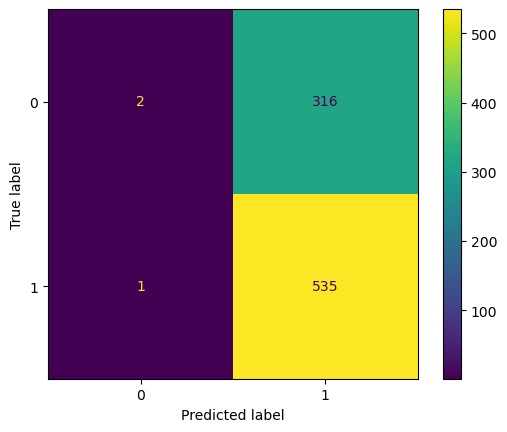

In [24]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred)).plot()

In [25]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.01      0.01       318
           1       0.63      1.00      0.77       536

    accuracy                           0.63       854
   macro avg       0.65      0.50      0.39       854
weighted avg       0.64      0.63      0.49       854



## Using Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
RF = RandomForestClassifier()

In [28]:
RF.fit(x_train,y_train)
y_pred=RF.predict(x_val)
accuracy_score(y_val,y_pred) * 100

97.54098360655738

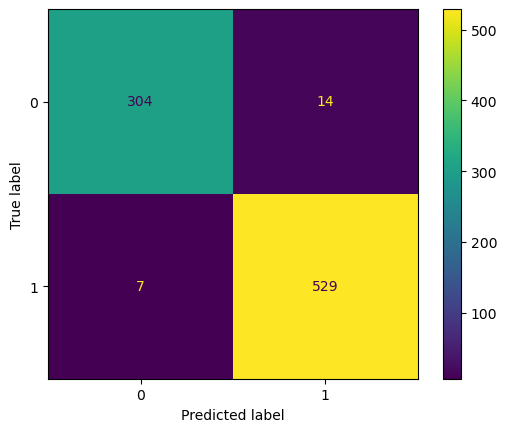

In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred)).plot()

## Saving the Model

In [30]:
import pickle
with open('models/random_forest.bin', 'wb') as f_out:
    pickle.dump(RF, f_out)

# Experiment Tracking

In [31]:
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow.db") # needed to run with sqlite
mlflow.set_experiment("Loan-Approval-Expirements")

2023/07/23 18:25:45 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/07/23 18:25:47 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

<Experiment: artifact_location='file:///C:/Users/user/Desktop/Projectmlzoomcamp/MLOPSZoomcampProject/mlruns/1', creation_time=1690125954214, experiment_id='1', last_update_time=1690125954214, lifecycle_stage='active', name='Loan-Approval-Expirements', tags={}>

In [32]:
mlflow.sklearn.autolog()

for model_class in (RandomForestClassifier, LogisticRegression):

    with mlflow.start_run():

        mlflow.log_param("train-data-path", "./data/loan_approval_dataset.csv")
        mlflow.log_param("valid-data-path", "./data/loan_approval_dataset.csv")
        mlflow.log_artifact("models/random_forest.bin", artifact_path="preprocessor")

        mlmodel = model_class()
        mlmodel.fit(x_train, y_train)

        y_pred = mlmodel.predict(x_val)
        acc = accuracy_score(y_val, y_pred) * 100
        mlflow.log_metric("accuracy", acc)
    
        

2023/07/23 18:25:57 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\anaconda3\envs\mlops\lib\site-packages\mlflow\models\signature.py:137: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/07/23 18:26:02 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\anaconda3\envs\mlops\lib\s

In [ ]:
!mlflow ui